In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%matplotlib inline

In [6]:
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.table as mtable
from matplotlib import rcParams

import pandas as pd

import graphs as gr
import intro_plots as ip

rcParams['figure.dpi'] = 200
deck_path = Path('../deck/figures/')

In [7]:
df = pd.read_csv("nydata")
nydf = df[df['NAME'].isin(ip.cdict.keys())].copy()
nydf['color'] = nydf['NAME'].replace(ip.cdict)

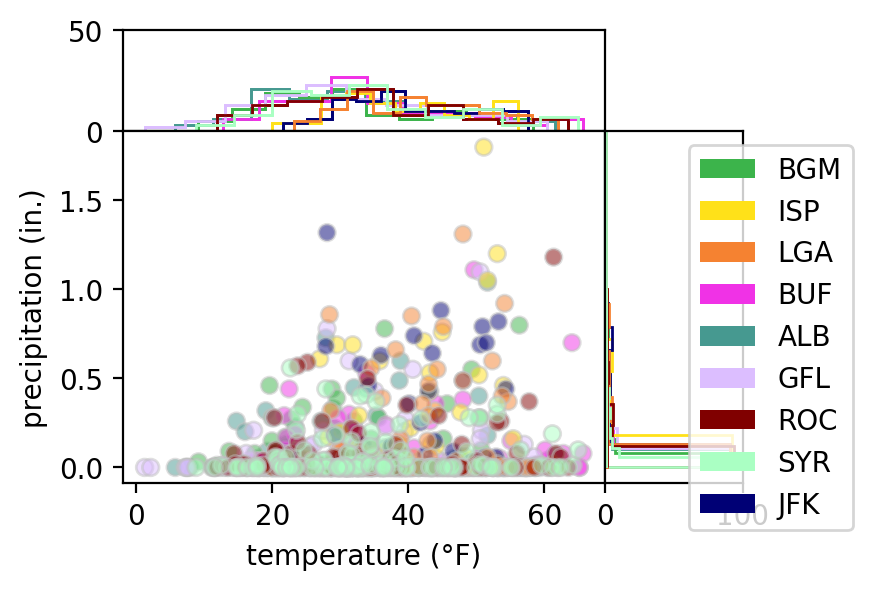

In [8]:
fig = plt.figure(figsize=(4,3))
axd=gr.linked_plot(fig, nydf)

In [9]:
sample = nydf[['NAME', 'TAVGF','PRCPI']][nydf['PRCPI']>0].sample(frac=1,
                                            random_state=12892).head(10).astype('str')

In [10]:
sample.columns.to_list()

['NAME', 'TAVGF', 'PRCPI']

In [11]:
sampleP = sample.copy()
sampleP[['gap']]=" "
sampleP[['NAME', 'gap', 'TAVGF', 'gap', 'PRCPI']]

,NAME,gap,TAVGF,gap,PRCPI
28243,NEW YORK LAGUARDIA AP,,42.98,,0.468503
3989,BINGHAMTON,,29.84,,0.031496
28121,NEW YORK JFK INTL AP,,40.82,,0.740156
19907,ISLIP LI MACARTHUR AP,,33.98,,0.070866
41646,SYRACUSE HANCOCK INTL AP,,34.34,,0.011811
3971,BINGHAMTON,,30.38,,0.011811
341,ALBANY AP,,40.28,,0.011811
35533,ROCHESTER GTR INTL AP,,20.3,,0.051181
41602,SYRACUSE HANCOCK INTL AP,,12.56,,0.011811
5825,BUFFALO,,32.72,,0.070866


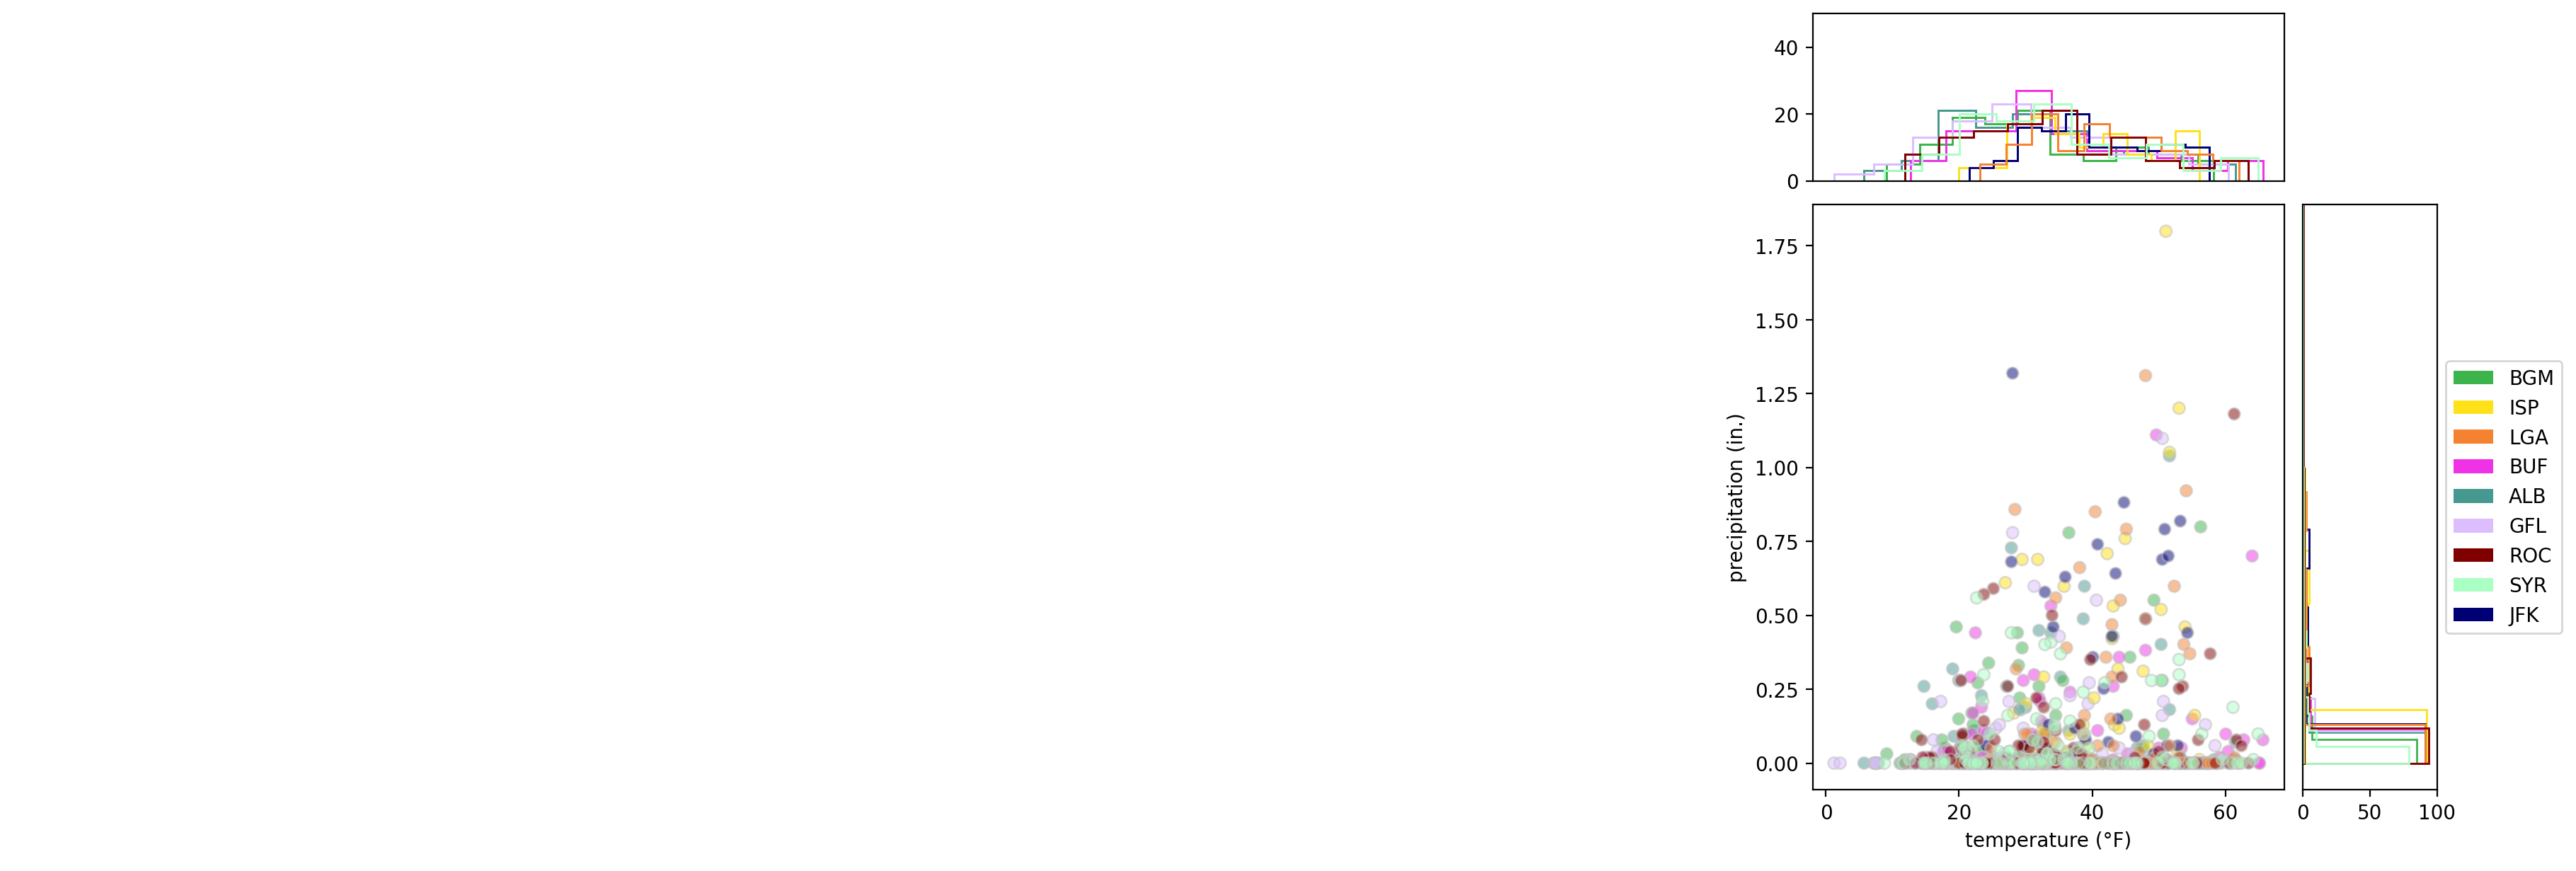

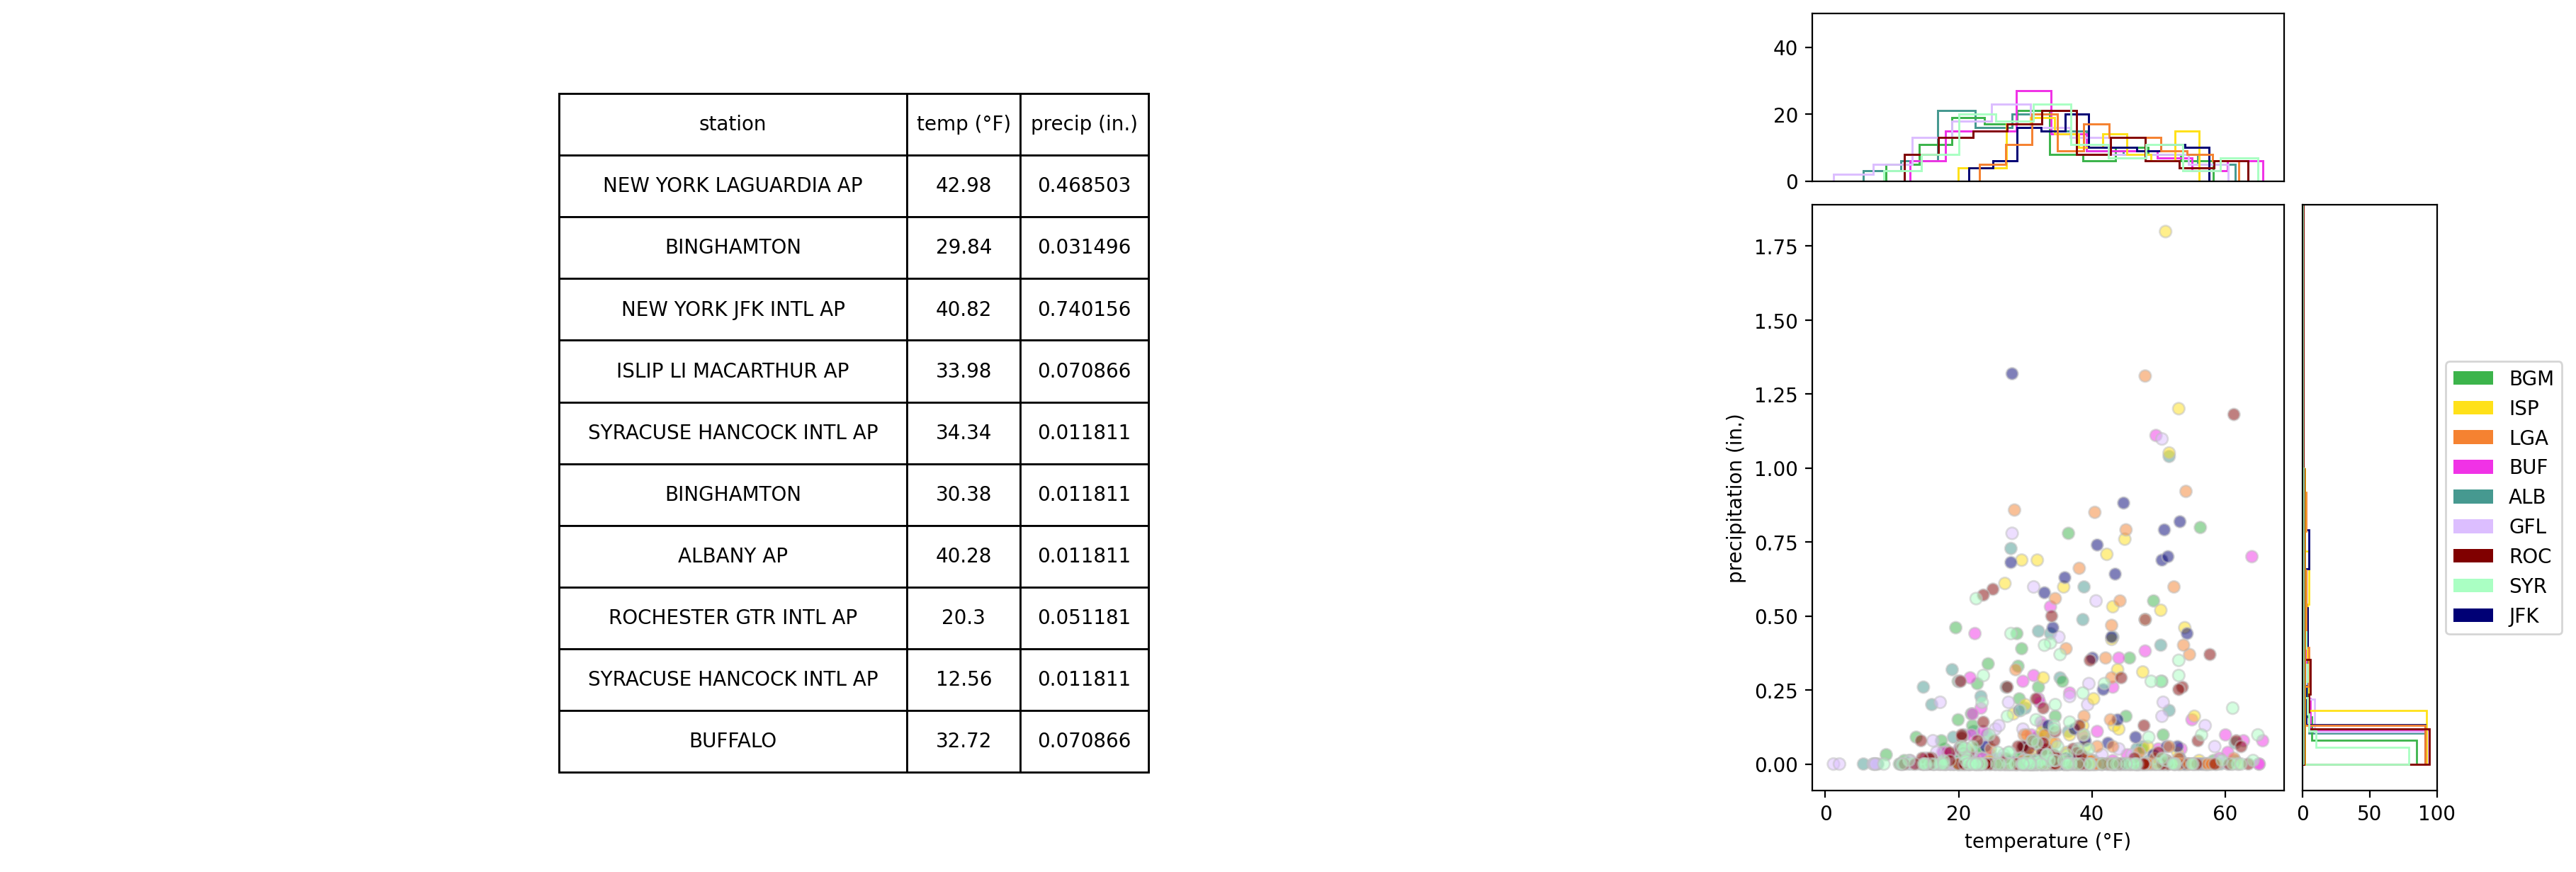

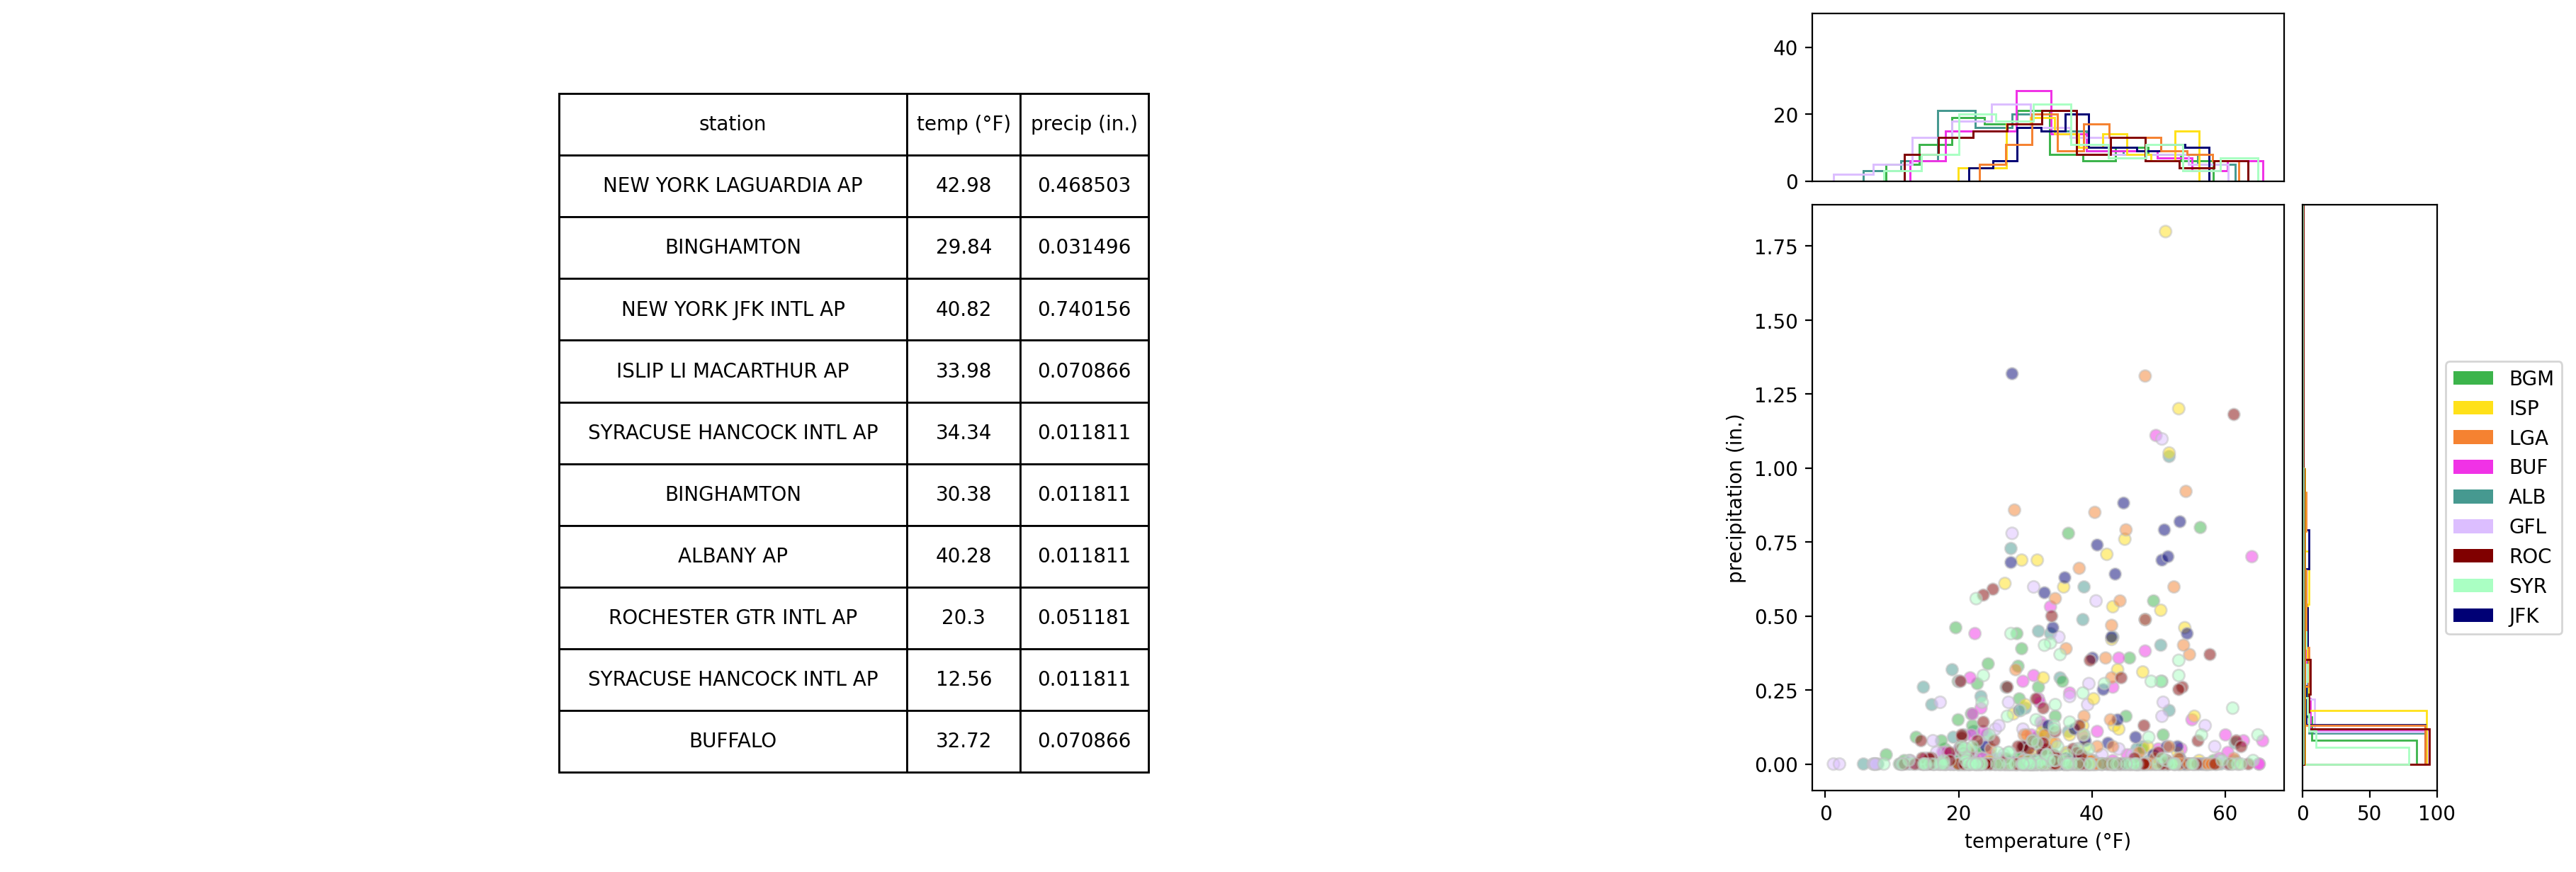

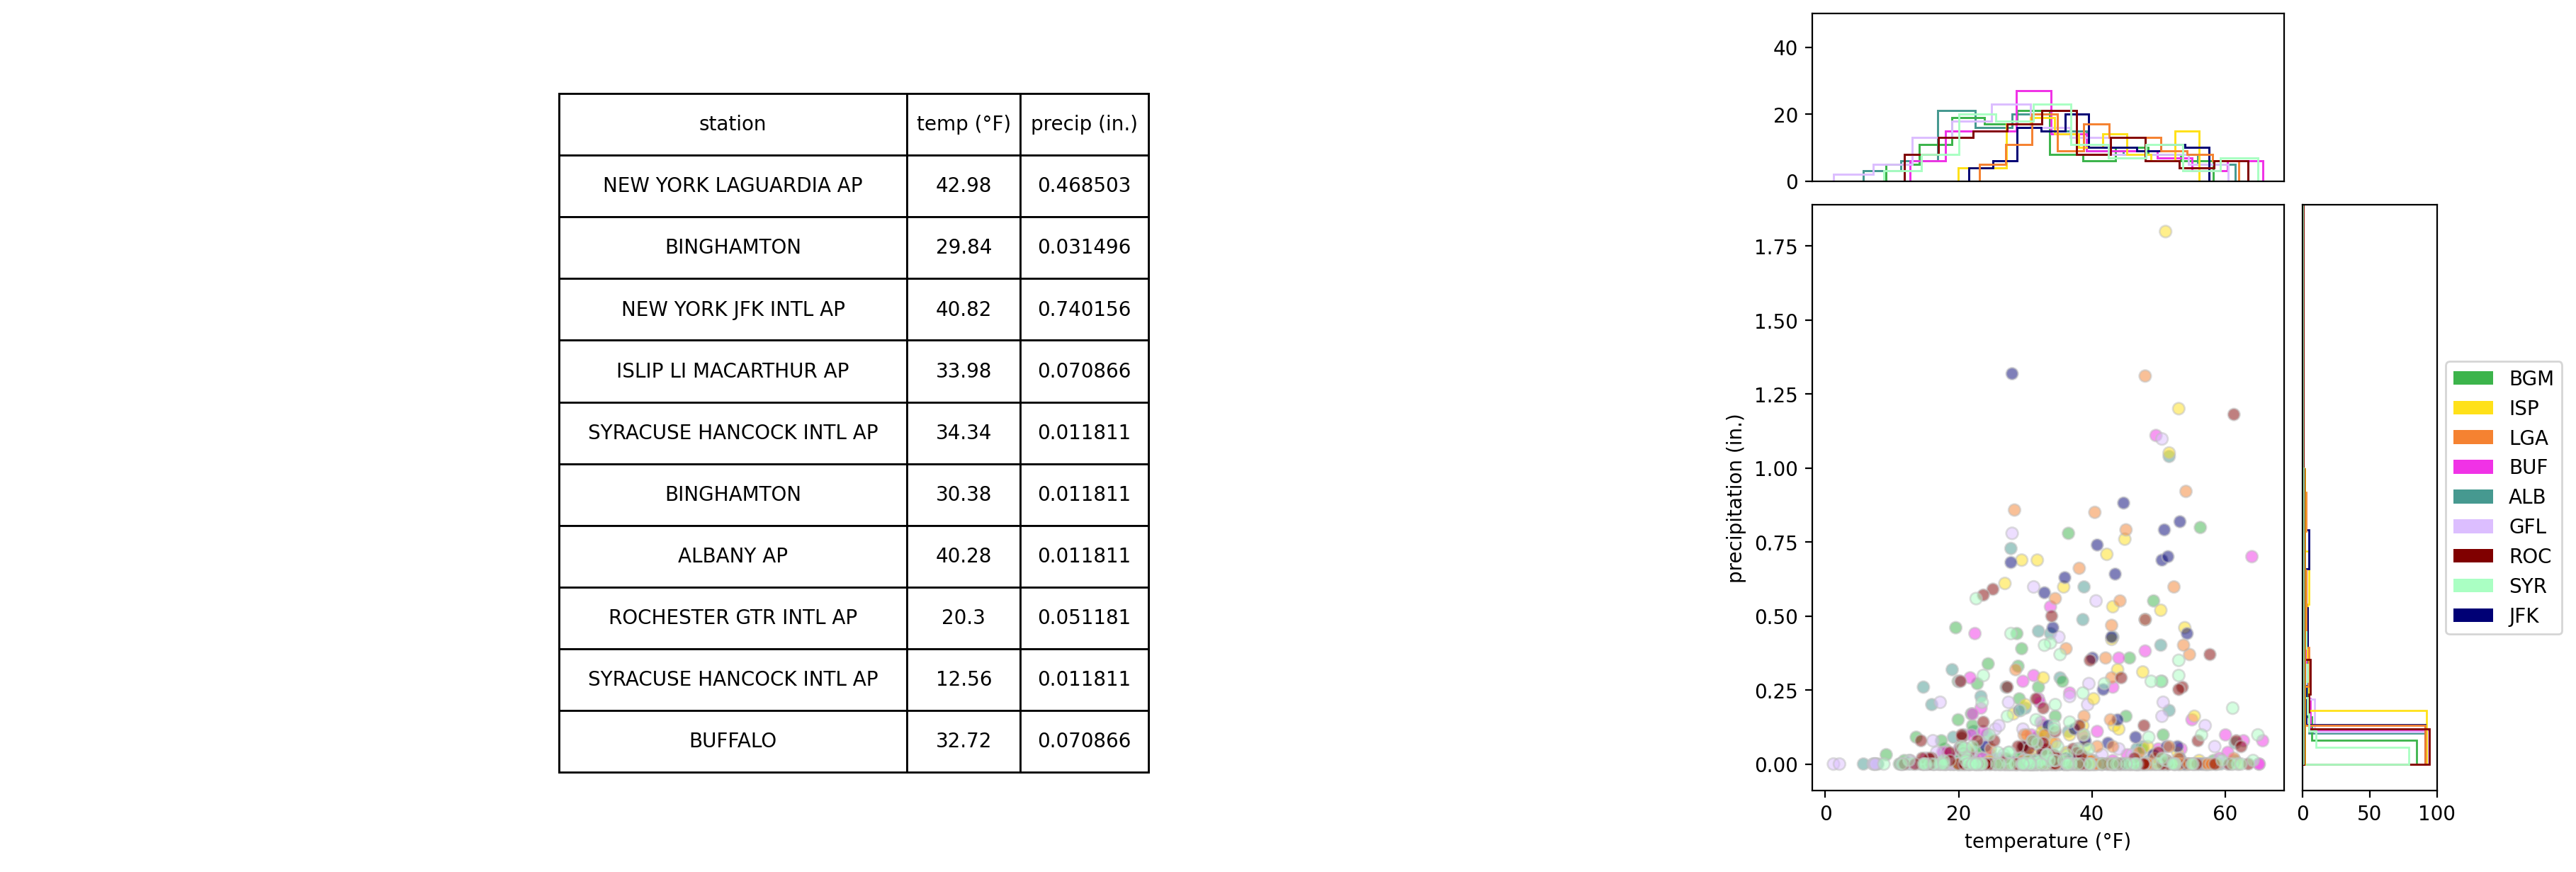

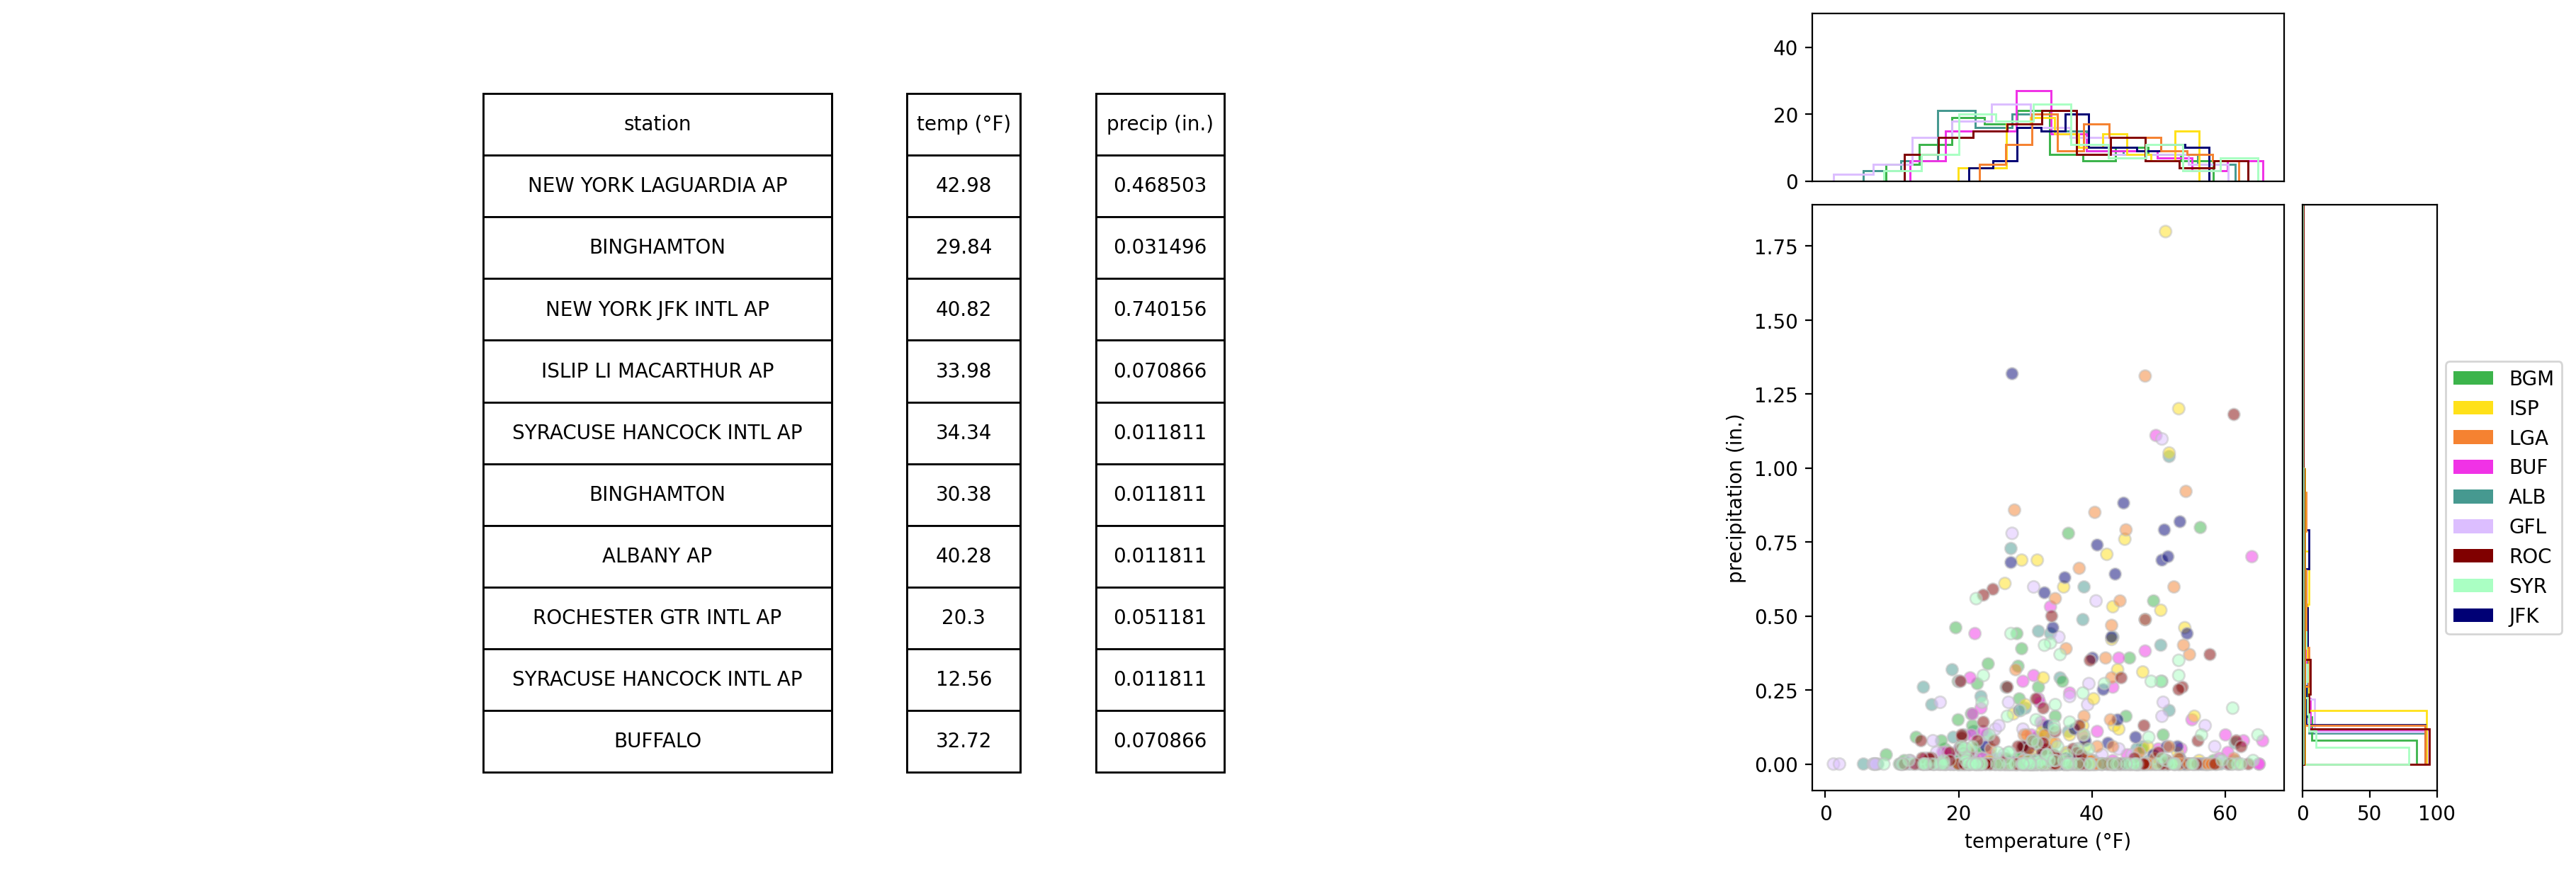

In [60]:
labels = {'NAME': 'station', 'TAVGF':'temp (°F)', 'PRCPI':'precip (in.)', 'gap':'gap'}

scale = (1.5,2)
    
for stage in range(5):
    fig = plt.figure(figsize=(18, 6), constrained_layout=True)
    fig0, fig1 = fig.subfigures(1, 2, width_ratios=[2,1])
    axd = gr.linked_plot(fig1, nydf)
    ax = fig0.subplots()
    
    if stage == 0:
        ax.set_visible(False)
    elif stage in [1,2,3]:
        c = ['NAME', 'TAVGF', 'PRCPI']
        l = [labels[k] for k in c]
        tab = gr.plot_table(ax, sampleP[c].values, l, scale=scale)
    elif stage in [4,5]:
        c = ['NAME', 'gap', 'TAVGF', 'gap', 'PRCPI']
        l = [labels[k] for k in c]
        tab = gr.plot_table(ax, sampleP[c].values, l, scale=scale) 
    elif stage in [6, 7]:
        c = ['NAME', 'gap', 'TAVGF', 'gap','TAVGF','gap', 'PRCPI', 'gap', 'PRCPI']
        l = [labels[k] for k in c]
        tab = gr.plot_table(ax, sampleP[c].values, l, scale=scale) 
    elif stage in [8]:
        c = ['NAME', 'gap', 'NAME', 'gap', 'TAVGF', 'gap','TAVGF','gap', 'PRCPI', 'gap', 'PRCPI']
        l = [labels[k] for k in c]
        tab = gr.plot_table(ax, sampleP[c].values, l, scale=scale) 

    fig.savefig(deck_path/f"sh{stage}.png")
    
